In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Load data

In [11]:
# Bring in X_train and X_test data previously saved as numpy arrays
X_train = np.load('./Data/xtraindata.npy')
X_test = np.load('./Data/xtestdata.npy')
y_train = np.load('./Data/ytraindata.npy')
y_test = np.load('./Data/ytestdata.npy')

In [3]:
# confirm shapes
X_train.shape

(900, 360, 480)

In [13]:
X_test.shape

(379, 360, 480)

In [14]:
y_train.shape

(900,)

In [15]:
y_test.shape

(379,)

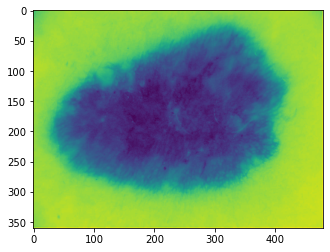

In [4]:
# sample image, confirm dimensions
plt.imshow(X_train[0])

## Build CNN model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [23]:
# define the model
im_rows = 360
im_cols = 480
im_shape = (im_rows, im_cols, 1)

X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)

# confirm shape
print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))

x_train shape: (900, 360, 480, 1)
x_test shape: (379, 360, 480, 1)


In [24]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    
    Conv2D(64, kernel_size=3, activation='relu'),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=3, activation='relu'),
    Dropout(0.4),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

In [25]:
cnn_model.compile(optimizer=Adam(lr=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=2
)

Train on 900 samples, validate on 379 samples
Epoch 1/10


In [81]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 360, 480, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 180, 240, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 180, 240, 32)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1382400)           0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                44236832  
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

In [82]:
# Evaluate the model using the training data
score = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {score[0]}, Accuracy: {score[1]}")

379/379 - 8s - loss: 0.4847 - accuracy: 0.8074
Loss: 0.48473816142862264, Accuracy: 0.8073878884315491


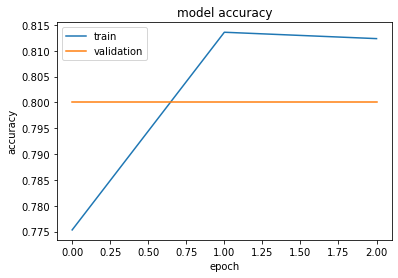

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

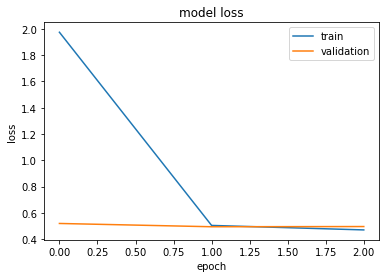

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

### Test Prediction

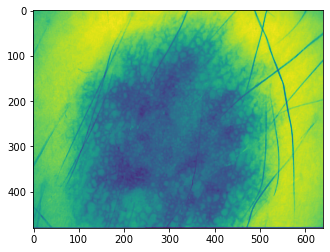

In [85]:
# Load the image and resize to default image size
image_path = './Images/Predictions/ISIC_0362853-b.jpg'
image = cv2.imread(image_path, 0)
plt.imshow(image)

In [86]:
# Resize image. For cv2, it is (height,width)
dsize = (480, 360)
imgresized = cv2.resize(image, dsize)/255
imgresized.shape

(360, 480)

In [87]:
# Make prediction
prediction = cnn_model.predict(imgresized.reshape(1,360,480,1))
prediction

array([[0.7401593, 0.2598407]], dtype=float32)

In [88]:
# Save the model
cnn_model.save("cnn_model.h5")